In [17]:
import numpy as np
import pandas as pd
import h5py
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
train=h5py.File('train_signs.h5','r')
train_orig_x=np.array(train['train_set_x'])
train_orig_y=np.array(train['train_set_y'])
print(train_orig_x.shape)
print(train_orig_y.shape)
test=h5py.File('test_signs.h5','r')
list(test.keys())
test_orig_x=np.array(test['test_set_x'])
test_orig_y=np.array(test['test_set_y'])
print('test_x shape is {} test_y shape is {}'.format(test_orig_x.shape,test_orig_y.shape))
#reshaping the data in the form of (nx,m) where m in number of examples
train_x_flat=train_orig_x.reshape(train_orig_x.shape[0],-1).T
test_x_flat=test_orig_x.reshape(test_orig_x.shape[0],-1).T
train_y=train_orig_y
test_y=test_orig_y
#reshaping the data 
train_x=train_x_flat/255.
test_x=test_x_flat/255.
print('train_x shape is {} test_x shape is {}'.format(train_x.shape,test_x.shape)) 
#now choosing the train and test set for only 2 classes 2 class is taken as 1 and rest are 1,3,4 is taken as 0
train_cl_df=pd.DataFrame(train_orig_y,columns=['Class_labels'])
li_2_train=train_cl_df[train_cl_df.Class_labels==2].index.tolist()
train_orig_x_2=train_orig_x[li_2_train]
li_1_3_4_train=train_cl_df[train_cl_df.Class_labels.isin([1,3,4])].index.tolist()
train_orig_x_1_3_4=train_orig_x[li_1_3_4_train]
train_orig_2_1_3_4=np.concatenate((train_orig_x_2,train_orig_x_1_3_4),axis=0)
#doing random shuffling before flattening
np.random.seed(3)
shuffle=np.random.randint(0,720,size=720)
train_orig_2_1_3_4=train_orig_2_1_3_4[shuffle]
train_orig_x_2=train_orig_2_1_3_4.reshape(train_orig_2_1_3_4.shape[0],-1).T
train_orig_x_2#this is the train data with 2 classes 
train_y_2_1_3_4=np.concatenate((np.ones(180),np.zeros(540)))
train_orig_y_2=train_y_2_1_3_4[shuffle]
train_x_2=train_orig_x_2/255.0
#similarly preparing the test data 
test_cl_df=pd.DataFrame(test_orig_y,columns=['class_labels'])
li_test_2=test_cl_df[test_cl_df.class_labels==2].index.tolist()
li_test_1_3_4=test_cl_df[test_cl_df.class_labels.isin([1,3,4])].index.tolist()
test_orig_x_2=np.concatenate((test_orig_x[li_test_2],test_orig_x[li_test_1_3_4]),axis=0)
test_orig_y_2=np.concatenate((np.ones(20),np.zeros(60)),axis=0)
np.random.seed(3)
test_shuffle=np.random.randint(0,80,80)
test_shuffle
test_orig_x_2=test_orig_x_2[test_shuffle]
test_orig_y_2=test_orig_y_2[test_shuffle]
test_x_2=test_orig_x_2.reshape(test_orig_x_2.shape[0],-1).T
test_x_2=test_x_2/255.0
test_orig_y_2=test_orig_y_2.reshape(test_orig_y_2.shape[0],-1).T
train_orig_y_2=train_orig_y_2.reshape(train_orig_y_2.shape[0],-1).T


(1080, 64, 64, 3)
(1080,)
test_x shape is (120, 64, 64, 3) test_y shape is (120,)
train_x shape is (12288, 1080) test_x shape is (12288, 120)


In [15]:
def two_layer_model(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 3000, print_cost=False):
    """
    Implements a two-layer neural network: LINEAR->RELU->LINEAR->SIGMOID.
    
    Arguments:
    X -- input data, of shape (n_x, number of examples)
    Y -- true "label" vector (containing 0 if cat, 1 if n on-cat), of shape (1, number of examples)
    layers_dims -- dimensions of the layers (n_x, n_h, n_y)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- If set to True, this will print the cost every 100 iterations 
    
    Returns:
    parameters -- a dictionary containing W1, W2, b1, and b2
    """
    
    np.random.seed(1)
    grads = {}
    costs = []                              # to keep track of the cost
    m = X.shape[1]                           # number of examples
    (n_x, n_h, n_y) = layers_dims
    
    # Initialize parameters dictionary, by calling one of the functions you'd previously implemented
    ### START CODE HERE ### (≈ 1 line of code)
    parameters = initialize_parameters(n_x, n_h, n_y)
    ### END CODE HERE ###
    
    # Get W1, b1, W2 and b2 from the dictionary parameters.
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    # Loop (gradient descent)

    for i in range(0, num_iterations):

        # Forward propagation: LINEAR -> RELU -> LINEAR -> SIGMOID. Inputs: "X, W1, b1, W2, b2". Output: "A1, cache1, A2, cache2".
        ### START CODE HERE ### (≈ 2 lines of code)
        A1, cache1 = linear_activation_forward(X,W1,b1,activation='relu')
        A2, cache2 = linear_activation_forward(A1,W2,b2,activation='sigmoid')
        ### END CODE HERE ###
        
        # Compute cost
        ### START CODE HERE ### (≈ 1 line of code)
        cost = compute_cost(A2,Y)
        ### END CODE HERE ###
        
        # Initializing backward propagation
        dA2 = - (np.divide(Y, A2) - np.divide(1 - Y, 1 - A2))
        
        # Backward propagation. Inputs: "dA2, cache2, cache1". Outputs: "dA1, dW2, db2; also dA0 (not used), dW1, db1".
        ### START CODE HERE ### (≈ 2 lines of code)
        dA1, dW2, db2 = linear_activation_backward(dA2,cache2,activation='sigmoid')
        dA0, dW1, db1 = linear_activation_backward(dA1,cache1,activation='relu')
        ### END CODE HERE ###
        
        # Set grads['dWl'] to dW1, grads['db1'] to db1, grads['dW2'] to dW2, grads['db2'] to db2
        grads['dW1'] = dW1
        grads['db1'] = db1
        grads['dW2'] = dW2
        grads['db2'] = db2
        
        # Update parameters.
        ### START CODE HERE ### (approx. 1 line of code)
        parameters = update_parameters(parameters,grads,learning_rate)
        ### END CODE HERE ###

        # Retrieve W1, b1, W2, b2 from parameters
        W1 = parameters["W1"]
        b1 = parameters["b1"]
        W2 = parameters["W2"]
        b2 = parameters["b2"]
        
        # Print the cost every 100 training example
        if print_cost and i % 100 == 0:
            print("Cost after iteration {}: {}".format(i, np.squeeze(cost)))
        if print_cost and i % 100 == 0:
            costs.append(cost)
       
    # plot the cost

    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters


def linear_activation_forward(A_prev, W, b, activation):
    """
    Implement the forward propagation for the LINEAR->ACTIVATION layer

    Arguments:
    A_prev -- activations from previous layer (or input data): (size of previous layer, number of examples)
    W -- weights matrix: numpy array of shape (size of current layer, size of previous layer)
    b -- bias vector, numpy array of shape (size of the current layer, 1)
    activation -- the activation to be used in this layer, stored as a text string: "sigmoid" or "relu"

    Returns:
    A -- the output of the activation function, also called the post-activation value 
    cache -- a python dictionary containing "linear_cache" and "activation_cache";
             stored for computing the backward pass efficiently
    """
    
    if activation == "sigmoid":
        # Inputs: "A_prev, W, b". Outputs: "A, activation_cache".
        ### START CODE HERE ### (≈ 2 lines of code)
        Z, linear_cache = linear_forward(A_prev,W,b)
        A, activation_cache = sigmoid(Z)
        ### END CODE HERE ###
    
    elif activation == "relu":
        # Inputs: "A_prev, W, b". Outputs: "A, activation_cache".
        ### START CODE HERE ### (≈ 2 lines of code)
        Z, linear_cache = linear_forward(A_prev,W,b)
        A, activation_cache = relu(Z)
        ### END CODE HERE ###
    
    assert (A.shape == (W.shape[0], A_prev.shape[1]))
    cache = (linear_cache, activation_cache)

    return A, cache



def linear_forward(A, W, b):
    """
    Implement the linear part of a layer's forward propagation.

    Arguments:
    A -- activations from previous layer (or input data): (size of previous layer, number of examples)
    W -- weights matrix: numpy array of shape (size of current layer, size of previous layer)
    b -- bias vector, numpy array of shape (size of the current layer, 1)

    Returns:
    Z -- the input of the activation function, also called pre-activation parameter 
    cache -- a python dictionary containing "A", "W" and "b" ; stored for computing the backward pass efficiently
    """
    
    ### START CODE HERE ### (≈ 1 line of code)
    Z = np.dot(W,A)+b
    ### END CODE HERE ###
    
    assert(Z.shape == (W.shape[0], A.shape[1]))
    cache = (A, W, b)
    
    return Z, cache


def linear_backward(dZ, cache):
    """
    Implement the linear portion of backward propagation for a single layer (layer l)

    Arguments:
    dZ -- Gradient of the cost with respect to the linear output (of current layer l)
    cache -- tuple of values (A_prev, W, b) coming from the forward propagation in the current layer

    Returns:
    dA_prev -- Gradient of the cost with respect to the activation (of the previous layer l-1), same shape as A_prev
    dW -- Gradient of the cost with respect to W (current layer l), same shape as W
    db -- Gradient of the cost with respect to b (current layer l), same shape as b
    """
    A_prev, W, b = cache
    m = A_prev.shape[1]

    ### START CODE HERE ### (≈ 3 lines of code)
    dW = (np.dot(dZ,A_prev.T))/m
    db = np.sum(dZ,axis=1,keepdims=True)/m
    dA_prev = np.dot(W.T,dZ)
    
    ### END CODE HERE ###
    
    assert (dA_prev.shape == A_prev.shape)
    assert (dW.shape == W.shape)
    assert (db.shape == b.shape)
    
    return dA_prev, dW, db


def sigmoid(Z):
    """
    Implements the sigmoid activation in numpy
    
    Arguments:
    Z -- numpy array of any shape
    
    Returns:
    A -- output of sigmoid(z), same shape as Z
    cache -- returns Z as well, useful during backpropagation
    """
    
    A = 1/(1+np.exp(-Z))
    cache = Z
    
    return A, cache

def relu(Z):
    """
    Implement the RELU function.

    Arguments:
    Z -- Output of the linear layer, of any shape

    Returns:
    A -- Post-activation parameter, of the same shape as Z
    cache -- a python dictionary containing "A" ; stored for computing the backward pass efficiently
    """
    
    A = np.maximum(0,Z)
    
    assert(A.shape == Z.shape)
    
    cache = Z 
    return A, cache


def relu_backward(dA, cache):
    """
    Implement the backward propagation for a single RELU unit.

    Arguments:
    dA -- post-activation gradient, of any shape
    cache -- 'Z' where we store for computing backward propagation efficiently

    Returns:
    dZ -- Gradient of the cost with respect to Z
    """
    
    Z = cache
    dZ = np.array(dA, copy=True) # just converting dz to a correct object.
    
    # When z <= 0, you should set dz to 0 as well. 
    dZ[Z <= 0] = 0
    
    assert (dZ.shape == Z.shape)
    
    return dZ

def sigmoid_backward(dA, cache):
    """
    Implement the backward propagation for a single SIGMOID unit.

    Arguments:
    dA -- post-activation gradient, of any shape
    cache -- 'Z' where we store for computing backward propagation efficiently

    Returns:
    dZ -- Gradient of the cost with respect to Z
    """
    
    Z = cache
    
    s = 1/(1+np.exp(-Z))
    dZ = dA * s * (1-s)
    
    assert (dZ.shape == Z.shape)
    
    return dZ

def compute_cost(AL, Y):
    """
    Implement the cost function defined by equation (7).

    Arguments:
    AL -- probability vector corresponding to your label predictions, shape (1, number of examples)
    Y -- true "label" vector (for example: containing 0 if non-cat, 1 if cat), shape (1, number of examples)

    Returns:
    cost -- cross-entropy cost
    """
    
    m = Y.shape[1]

    # Compute loss from aL and y.
    ### START CODE HERE ### (≈ 1 lines of code)
    cost = -(np.sum(np.multiply(Y,np.log(AL))+np.multiply((1-Y),np.log(1-AL))))/m
    ### END CODE HERE ###
    
    cost = np.squeeze(cost)      # To make sure your cost's shape is what we expect (e.g. this turns [[17]] into 17).
    assert(cost.shape == ())
    
    return cost


def linear_activation_backward(dA, cache, activation):
    """
    Implement the backward propagation for the LINEAR->ACTIVATION layer.
    
    Arguments:
    dA -- post-activation gradient for current layer l 
    cache -- tuple of values (linear_cache, activation_cache) we store for computing backward propagation efficiently
    activation -- the activation to be used in this layer, stored as a text string: "sigmoid" or "relu"
    
    Returns:
    dA_prev -- Gradient of the cost with respect to the activation (of the previous layer l-1), same shape as A_prev
    dW -- Gradient of the cost with respect to W (current layer l), same shape as W
    db -- Gradient of the cost with respect to b (current laylinear_activation_forwarder l), same shape as b
    """
    linear_cache, activation_cache = cache
    
    if activation == "relu":
        ### START CODE HERE ### (≈ 2 lines of code)
        dZ = relu_backward(dA,activation_cache)
        dA_prev, dW, db = linear_backward(dZ,linear_cache)
        ### END CODE HERE ###
        
    elif activation == "sigmoid":
        ### START CODE HERE ### (≈ 2 lines of code)
        dZ = sigmoid_backward(dA,activation_cache)
        dA_prev, dW, db = linear_backward(dZ,linear_cache)
        ### END CODE HERE ###
    
    return dA_prev, dW, db


def update_parameters(parameters, grads, learning_rate):
    """
    Update parameters using gradient descent
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    grads -- python dictionary containing your gradients, output of L_model_backward
    
    Returns:
    parameters -- python dictionary containing your updated parameters 
                  parameters["W" + str(l)] = ... 
                  parameters["b" + str(l)] = ...
    """
    
    L = len(parameters) // 2 # number of layers in the neural network

    # Update rule for each parameter. Use a for loop.
    ### START CODE HERE ### (≈ 3 lines of code)
    for l in range(L):
        parameters["W" + str(l+1)] = parameters["W" + str(l+1)]-learning_rate*grads["dW" + str(l + 1)]
        parameters["b" + str(l+1)] = parameters["b" + str(l+1)]-learning_rate*grads["db"+str(l+1)]
    ### END CODE HERE ###
    return parameters

def initialize_parameters(n_x, n_h, n_y):
    W1=np.random.randn(n_h,n_x)*0.01
    b1=np.zeros([n_h,1])
    W2=np.random.randn(n_y,n_h)*0.01
    b2=np.zeros([n_y,1])
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    return parameters

In [18]:
def predict(X, y, parameters):
    """
    This function is used to predict the results of a  L-layer neural network.
    
    Arguments:
    X -- data set of examples you would like to label
    parameters -- parameters of the trained model
    
    Returns:
    p -- predictions for the given dataset X
    """
    
    m = X.shape[1]
    n = len(parameters) // 2 # number of layers in the neural network
    p = np.zeros((1,m))
    
    # Forward propagation
    probas, caches = L_model_forward(X, parameters)

    
    # convert probas to 0/1 predictions
    for i in range(0, probas.shape[1]):
        if probas[0,i] > 0.5:
            p[0,i] = 1
        else:
            p[0,i] = 0
    
    #print results
    #print ("predictions: " + str(p))
    #print ("true labels: " + str(y))
    print("Accuracy: "  + str(np.sum((p == y)/m)))
        
    return p

def L_model_forward(X, parameters):
    """
    Implement forward propagation for the [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID computation
    
    Arguments:
    X -- data, numpy array of shape (input size, number of examples)
    parameters -- output of initialize_parameters_deep()
    
    Returns:
    AL -- last post-activation value
    caches -- list of caches containing:
                every cache of linear_relu_forward() (there are L-1 of them, indexed from 0 to L-2)
                the cache of linear_sigmoid_forward() (there is one, indexed L-1)
    """

    caches = []
    A = X
    L = len(parameters) // 2                  # number of layers in the neural network
    
    # Implement [LINEAR -> RELU]*(L-1). Add "cache" to the "caches" list.
    for l in range(1, L):
        A_prev = A 
        A, cache = linear_activation_forward(A_prev, parameters['W' + str(l)], parameters['b' + str(l)], activation = "relu")
        caches.append(cache)
    
    # Implement LINEAR -> SIGMOID. Add "cache" to the "caches" list.
    AL, cache = linear_activation_forward(A, parameters['W' + str(L)], parameters['b' + str(L)], activation = "sigmoid")
    caches.append(cache)
    
    assert(AL.shape == (1,X.shape[1]))
            
    return AL, caches

Cost after iteration 0: 0.6909447889515705
Cost after iteration 100: 0.5286279752548879
Cost after iteration 200: 0.5209773934658863
Cost after iteration 300: 0.5051888578662531
Cost after iteration 400: 0.4740155171125038
Cost after iteration 500: 0.4296491094084164
Cost after iteration 600: 0.45930843233176516
Cost after iteration 700: 0.43839787519714396
Cost after iteration 800: 0.4283539429712511
Cost after iteration 900: 0.4105835334300361
Cost after iteration 1000: 0.401062759468696
Cost after iteration 1100: 0.3899012272827242
Cost after iteration 1200: 0.380381483811354
Cost after iteration 1300: 0.3674810781089854
Cost after iteration 1400: 0.35488979627738204
Cost after iteration 1500: 0.3420639963825829
Cost after iteration 1600: 0.34008072662268585
Cost after iteration 1700: 0.3332844343050388
Cost after iteration 1800: 0.3278470853785655
Cost after iteration 1900: 0.3151601222803141
Cost after iteration 2000: 0.32688552613354127
Cost after iteration 2100: 0.29090893294910

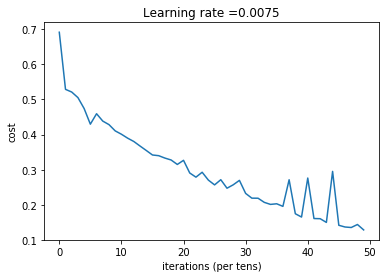

In [21]:
n_x=train_x_2.shape[0]
n_h=7
n_y=1
parameters = two_layer_model(train_x_2, train_orig_y_2, layers_dims = (n_x, n_h, n_y), num_iterations = 5000, print_cost=True)

In [20]:
p=predict(test_x_2,test_orig_y_2,parameters=parameters)
np.squeeze(p)

NameError: name 'parameters' is not defined